<a href="https://colab.research.google.com/github/FauzanAdithya/Python-Model-and-Simulation/blob/main/Python_14_Muh_Fauzan_Adithya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MUH. Fauzan ADITHYA - 1101184367 - TT-43-G11

**1. FUNGSI PERHITUNGAN DAYA TERIMA**

In [2]:
import numpy as Fauzan
import matplotlib.pyplot as grafik

In [3]:
def cos(frek,tipe,ht,hr,d):
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='Urban' :
        Cm=0
    elif tipe=='Suburban' :
        Cm= -2*((Fauzan.log10((frek/28)**2))-5.4)
    elif tipe=='Open' :
        Cm= -4.78*(Fauzan.log10(frek))+18.33*(Fauzan.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*Fauzan.log10(frek)-0.7)*hr-(1.56*Fauzan.log10(frek)-1.8)
    Lp = Ca+(Cb*Fauzan.log10(frek))-(13.83*Fauzan.log(ht))-ahr+((44.9-6.55*Fauzan.log10(ht))*Fauzan.log10(d))-Cm
    
    return Lp

In [5]:
f=1800 #MHz

loc1='Urban'
loc2='Suburban'
loc3='Open'

tower=80 #m
user=1.5 #m

d_min=200 #m
d_max=700 #m 

Ptx= 30000 #mw
Gtx= 10 #db
Grx= 2 #db

N=200 #titik
d=Fauzan.random.randint(d_min,d_max,N)

In [6]:
NtL = lambda x : 10*Fauzan.log10(x)
LtN = lambda x : 10**(x/10)

In [7]:
Ptx_convert= NtL(Ptx)

In [8]:
def Prx(ptx,PL,gain_tr,gain_rv):
    Ptx_convert= NtL(ptx) 
    prx = Ptx_convert - (PL + gain_tr + gain_rv)
    Prx_convert= LtN(prx) 

    return Prx_convert #mw

**GRAFIK 1 : GRAFIK VARIASI LOKASI - FREKUENSI 1800 MHZ**

In [9]:
LpUrban=cos(f,loc1,tower,user,d)
LpSuburban=cos(f,loc2,tower,user,d)
LpOpen=cos(f,loc3,tower,user,d)

In [10]:
Prx_Urban=Prx(Ptx_convert,LpUrban,Gtx,Grx )
Prx_Suburban=Prx(Ptx_convert,LpSuburban,Gtx,Grx)
Prx_Open=Prx(Ptx_convert,LpOpen,Gtx,Grx)

In [11]:
d_sort=d[Fauzan.argsort(d)]
Urban_sort=Prx_Urban[Fauzan.argsort(d)]
Suburban_sort=Prx_Suburban[Fauzan.argsort(d)]
Open_sort=Prx_Open[Fauzan.argsort(d)]

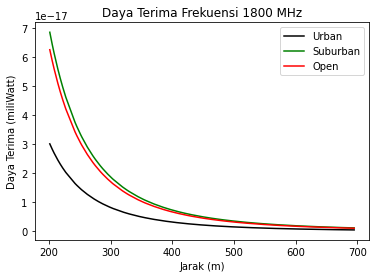

In [12]:
grafik.figure()
grafik.plot(d_sort,Urban_sort,'k-', label='Urban')
grafik.plot(d_sort,Suburban_sort,'g-', label='Suburban')
grafik.plot(d_sort,Open_sort,'r-', label='Open')
grafik.legend()
grafik.title('Daya Terima Frekuensi 1800 MHz')
grafik.xlabel('Jarak (m)')
grafik.ylabel('Daya Terima (miliWatt)')
grafik.show()

**GRAFIK 2 : GRAFIK VARIASI FREKUENSI - LOKASI URBAN**

In [13]:
f1=700 #MHz
f2=900 #MHz
f3=1800 #MHz
loc='Urban'

In [14]:
LpUrban1=cos(f1,loc,tower,user,d)
LpUrban2=cos(f2,loc,tower,user,d)
LpUrban3=cos(f3,loc,tower,user,d)

In [15]:
Prx_Urban1=Prx(Ptx_convert,LpUrban1,Gtx,Grx )
Prx_Urban2=Prx(Ptx_convert,LpUrban2,Gtx,Grx)
Prx_Urban3=Prx(Ptx_convert,LpUrban3,Gtx,Grx)

In [16]:
d_sort=d[Fauzan.argsort(d)]
Urban1_sort=Prx_Urban1[Fauzan.argsort(d)]
Urban2_sort=Prx_Urban2[Fauzan.argsort(d)]
Urban3_sort=Prx_Urban3[Fauzan.argsort(d)]

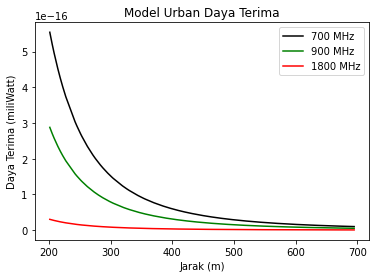

In [17]:
grafik.figure()
grafik.plot(d_sort,Urban1_sort,'k-', label='700 MHz')
grafik.plot(d_sort,Urban2_sort,'g-', label='900 MHz')
grafik.plot(d_sort,Urban3_sort,'r-', label='1800 MHz')
grafik.legend()
grafik.title('Model Urban Daya Terima')
grafik.xlabel('Jarak (m)')
grafik.ylabel('Daya Terima (miliWatt)')
grafik.show()

**2. FUNGSI PERHITUNGAN SIGNAL TO NOISE RATIO (SNR)**

In [18]:
BW= 5000000 #Hz

In [19]:
def snr(Prx, bw):
  noise=-174 + NtL(bw)
  Noise=LtN(noise)
  SNR=Prx/Noise
  return SNR

**GRAFIK 1 : GRAFIK VARIASI LOKASI - FREKUENSI 1800 MHZ**

In [20]:
SNR_Urban=snr(Prx_Urban,BW )
SNR_Suburban=snr(Prx_Suburban,BW)
SNR_Open=snr(Prx_Open,BW)

In [21]:
d_sort=d[Fauzan.argsort(d)]
snrUrban_sort=SNR_Urban[Fauzan.argsort(d)]
snrSuburban_sort=SNR_Suburban[Fauzan.argsort(d)]
snrOpen_sort=SNR_Open[Fauzan.argsort(d)]

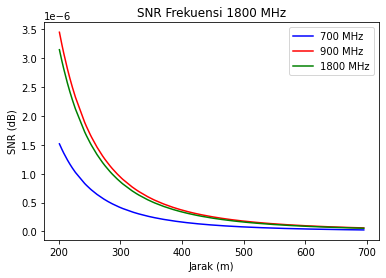

In [22]:
grafik.figure()
grafik.plot(d_sort,snrUrban_sort,'b-', label='700 MHz')
grafik.plot(d_sort,snrSuburban_sort,'r-', label='900 MHz')
grafik.plot(d_sort,snrOpen_sort,'g-', label='1800 MHz')
grafik.legend()
grafik.title('SNR Frekuensi 1800 MHz')
grafik.xlabel('Jarak (m)')
grafik.ylabel('SNR (dB)')
grafik.show()

**GRAFIK 2 : GRAFIK VARIASI FREKUENSI - LOKASI**

In [23]:
SNR_Urban1=snr(Prx_Urban1,BW )
SNR_Urban2=snr(Prx_Urban2,BW)
SNR_Urban3=snr(Prx_Urban3,BW)

In [24]:
d_sort=d[Fauzan.argsort(d)]
snrUrban1_sort=SNR_Urban1[Fauzan.argsort(d)]
snrUrban2_sort=SNR_Urban2[Fauzan.argsort(d)]
snrUrban3_sort=SNR_Urban3[Fauzan.argsort(d)]

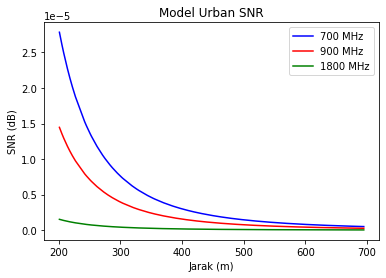

In [25]:
grafik.figure()
grafik.plot(d_sort,snrUrban1_sort,'b-', label='700 MHz')
grafik.plot(d_sort,snrUrban2_sort,'r-', label='900 MHz')
grafik.plot(d_sort,snrUrban3_sort,'g-', label='1800 MHz')
grafik.legend()
grafik.title('Model Urban SNR')
grafik.xlabel('Jarak (m)')
grafik.ylabel('SNR (dB)')
grafik.show()

**3. FUNGSI PERHITUNGAN KAPASITAS SELULER**

In [26]:
def C(Snr,Bw):
    capacity= Bw*Fauzan.log2(1+Snr)
    return capacity

**GRAFIK 1 : GRAFIK VARIASI LOKASI - FREKUENSI 1800 MHZ**

In [27]:
C_Urban=C(SNR_Urban,BW)
C_Suburban=C(SNR_Suburban,BW)
C_Open=C(SNR_Open,BW)

In [28]:
d_sort=d[Fauzan.argsort(d)]
UrbanC_sort=C_Urban[Fauzan.argsort(d)]
SuburbanC_sort=C_Suburban[Fauzan.argsort(d)]
OpenC_sort=C_Open[Fauzan.argsort(d)]

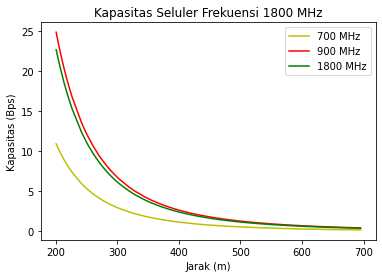

In [29]:
grafik.figure()
grafik.plot(d_sort,UrbanC_sort,'y-', label='700 MHz')
grafik.plot(d_sort,SuburbanC_sort,'r-', label='900 MHz')
grafik.plot(d_sort,OpenC_sort,'g', label='1800 MHz')
grafik.legend()
grafik.title('Kapasitas Seluler Frekuensi 1800 MHz')
grafik.xlabel('Jarak (m)')
grafik.ylabel('Kapasitas (Bps)')
grafik.show()

**GRAFIK 2 : GRAFIK VARIASI FREKUENSI - LOKASI URBAN**

In [30]:
C_Urban1=C(SNR_Urban1,BW)
C_Urban2=C(SNR_Urban2,BW)
C_Urban3=C(SNR_Urban3,BW)

In [34]:
d_sort=d[Fauzan.argsort(d)]
UrbanC1_sort=C_Urban1[Fauzan.argsort(d)]
UrbanC2_sort=C_Urban2[Fauzan.argsort(d)]
UrbanC3_sort=C_Urban3[Fauzan.argsort(d)]

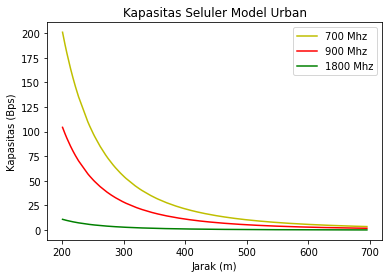

In [35]:
grafik.figure()
grafik.plot(d_sort,UrbanC1_sort,'y-', label='700 Mhz')
grafik.plot(d_sort,UrbanC2_sort,'r-', label='900 Mhz')
grafik.plot(d_sort,UrbanC3_sort,'g-', label='1800 Mhz')
grafik.legend()
grafik.title('Kapasitas Seluler Model Urban')
grafik.xlabel('Jarak (m)')
grafik.ylabel('Kapasitas (Bps)')
grafik.show()